In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [59]:
two_SNP_heatmap_df = pd.read_csv(snakemake.input.two_SNP_heatmap_csv)
samples = snakemake.params.samples
two_SNP_heatmap_df

,PANGENOME_VARIATION_ID,FIRST_SAMPLE,SECOND_SAMPLE
0,0,CFT073,H131800734
1,1,CFT073,H131800734
2,2,CFT073,H131800734
3,3,CFT073,H131800734
4,4,CFT073,H131800734
...,...,...,...
91946,92002,CFT073,H131800734
91947,92003,CFT073,H131800734
91948,92004,CFT073,H131800734
91949,92005,CFT073,H131800734


In [70]:
samples_ordered_by_clade = [
                # A
                "Escherichia_coli_MSB1_9D",
                "H131800734",
                "Escherichia_coli_MINF_8D",
                "Escherichia_coli_MSB1_1A",
                "Escherichia_coli_MSB1_8G",
  
                # B1
                "Escherichia_coli_MSB1_4E",
                "063_STEC",
                "CFT073",
                "Escherichia_coli_MSB2_1A",
                "Escherichia_coli_MINF_1D",
               
                # D
                "Escherichia_coli_MSB1_7C",
                "Escherichia_coli_MINF_7C",
                "Escherichia_coli_MSB1_6C",
                "ST38",
                "Escherichia_coli_MSB1_7A",
                "Escherichia_coli_MSB1_3B",
                
                # F
                "Escherichia_coli_MSB1_4I",
                "Escherichia_coli_MINF_1A",
                "Escherichia_coli_MINF_9A",
                "Escherichia_coli_MSB1_8B",
]

sample_to_colour = {
                # A
                "Escherichia_coli_MSB1_9D" : "#FF00FF",
                "H131800734" : "#FF00FF",
                "Escherichia_coli_MINF_8D" : "#FF00FF",
                "Escherichia_coli_MSB1_1A" : "#FF00FF",
                "Escherichia_coli_MSB1_8G" : "#FF00FF",
  
                # B1
                "Escherichia_coli_MSB1_4E" : "#00ceffff",
                "063_STEC" : "#00ceffff",
                "CFT073" : "#00ceffff",
                "Escherichia_coli_MSB2_1A" : "#00ceffff",
                "Escherichia_coli_MINF_1D" : "#00ceffff", 
               
                # D
                "Escherichia_coli_MSB1_7C" : "#008000ff",
                "Escherichia_coli_MINF_7C" : "#008000ff",
                "Escherichia_coli_MSB1_6C" : "#008000ff",
                "ST38" : "#008000ff",
                "Escherichia_coli_MSB1_7A" : "#008000ff",
                "Escherichia_coli_MSB1_3B" : "#008000ff",
                
                # F
                "Escherichia_coli_MSB1_4I" : "#FF0000",
                "Escherichia_coli_MINF_1A" : "#FF0000",
                "Escherichia_coli_MINF_9A" : "#FF0000",
                "Escherichia_coli_MSB1_8B" : "#FF0000"
}

In [ ]:
# sort samples according to their order in samples_ordered_by_clade
samples = [sample for sample in samples_ordered_by_clade if sample in samples]
samples

In [63]:
two_SNP_heatmap_df = two_SNP_heatmap_df.groupby(["FIRST_SAMPLE", "SECOND_SAMPLE"]).count().rename(columns={"PANGENOME_VARIATION_ID": "count"})
two_SNP_heatmap_df

,,count
FIRST_SAMPLE,SECOND_SAMPLE,
CFT073,H131800734,91951


In [64]:
count_matrix = np.zeros((len(samples), len(samples)), dtype=np.uint8)
for i, sample_i in enumerate(samples):
    for j, sample_j in enumerate(samples):
        if i != j:
            smaller_sample = min(sample_i, sample_j)
            larger_sample = max(sample_i, sample_j)        
            try: 
                count_matrix[i,j] = two_SNP_heatmap_df.xs((smaller_sample, larger_sample))["count"]
            except KeyError:
                count_matrix[i,j] = 0
            
count_matrix

array([[ 0, 47],
       [47,  0]], dtype=uint8)

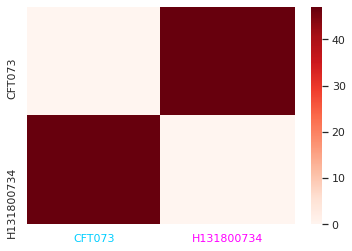

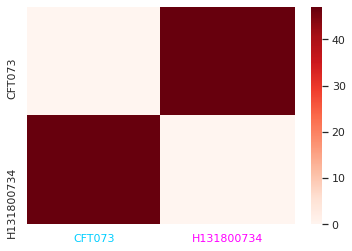

In [80]:
ax = sns.heatmap(count_matrix, xticklabels=samples, yticklabels=samples, cmap="Reds")
for tick in ax.get_xticklabels():
    tick.set_color(sample_to_colour[tick._text])
for tick in ax.get_yticklabels():
    tick.set_color(sample_to_colour[tick._text])
fig = ax.get_figure()
fig.savefig(snakemake.output.two_SNP_heatmap_plot)
fig